In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).first()

('2010-01-01',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_f = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(date_f[0])

# Calculate the date one year from the last date in data set.
date_o = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(date_o)

# Perform a query to retrieve the data and precipitation scores
result = session.query(measurement.date, measurement.prcp).filter(measurement.date > date_o).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(result, columns=['date', 'precipitation'])
df.head()

# Sort the dataframe by date
# DataFrame was already sorted when performing the Pandas function above

2017-08-23
2016-08-23


,date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


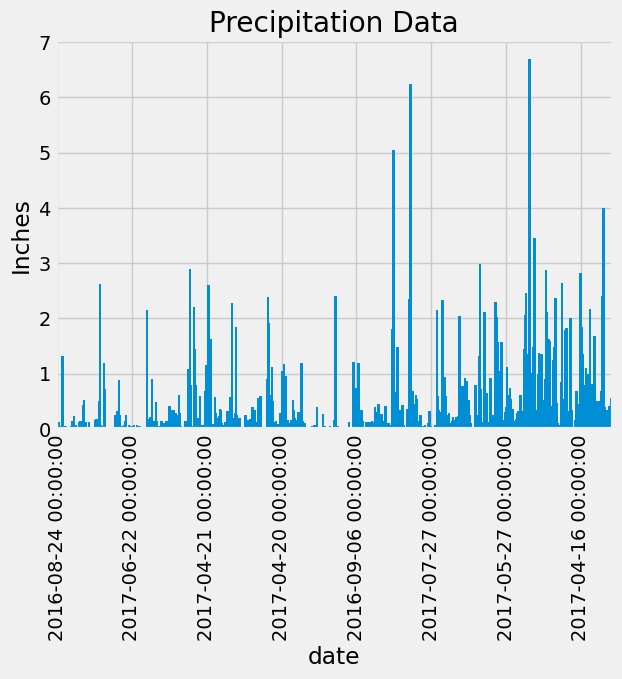

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
df['date'] = pd.to_datetime(df['date'])
ax = df.plot(x='date', y='precipitation', kind='bar', legend=False, width=10)
plt.xticks(rotation=90)
plt.ylabel('Inches')
plt.title('Precipitation Data')

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=300))

plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.id)).all()

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)) \
                     .group_by(measurement.station) \
                     .order_by(func.count(measurement.station).desc()) \
                     .all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station = 'USC00519281'
session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))\
    .filter(measurement.station == station).all()


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Final Date: 2017-08-18
Initial Date: 2016-08-18


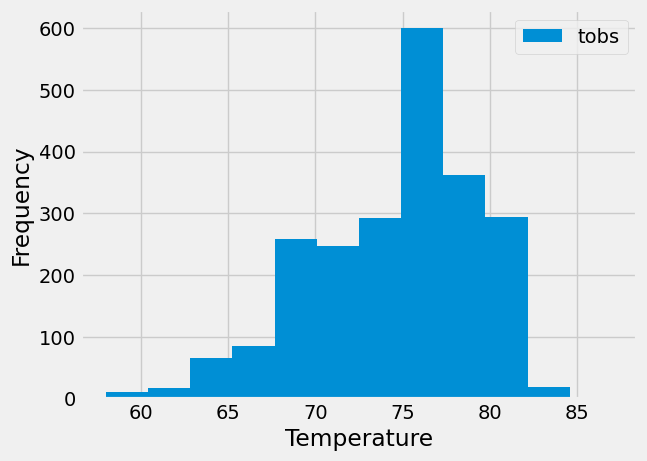

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Find the more recent date for the station
date_f = session.query(measurement.date).order_by(measurement.date.desc())\
    .filter(measurement.station == station).first()
print(f'Final Date: {date_f[0]}')

# Calculate the beginning date
date_o = dt.date(2017, 8, 18) - dt.timedelta(days=365)
print(f'Initial Date: {date_o}')

# Create the results query
result = session.query(measurement.tobs).filter(measurement.date > date_o).all()

# Create the DataFrame
df = pd.DataFrame(result, columns=['tobs'])

# Plot the DataFrame as a Histogram
df.plot(kind='hist', bins=12)
plt.xlabel("Temperature")
plt.show()

# Close Session

In [25]:
# Close Session
session.close()